In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Só muda o jeito de printar
np.set_printoptions(precision=3,suppress=True)


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', 
                      comment='\t', sep=' ', skipinitialspace=True)



In [4]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# Limpando os Dados
dataset = dataset.dropna()

# Converte a Origem em USA,EUROPA,JAPÃO pelos números na origem
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [7]:
# Divide os Dados entre Treino e Teste
train_dataset = dataset.sample(frac=0.8, random_state=0) # 80% para treino
test_dataset = dataset.drop(train_dataset.index) # 20% para teste

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose() 

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [8]:
# Faz uma copia 
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# Recebe o rotulo MPG
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
# lembrando que o metodo .pop() retorna o valor que foi apagado


In [9]:
# Função para Plotar
def plot(rotulo, x=None, y=None):
    plt.figure(figsize=(10, 8)) # Define o tamanho
    plt.scatter(train_features[rotulo], train_labels, label='Data') # scatter para um grafico de dispersão
    if x is not None and y is not None: # se x tem um valor e y tem um valor
        plt.plot(x, y, color='k', label='Predictions') # plota x e y
    plt.xlabel(rotulo)
    plt.ylabel('MPG')
    plt.legend()

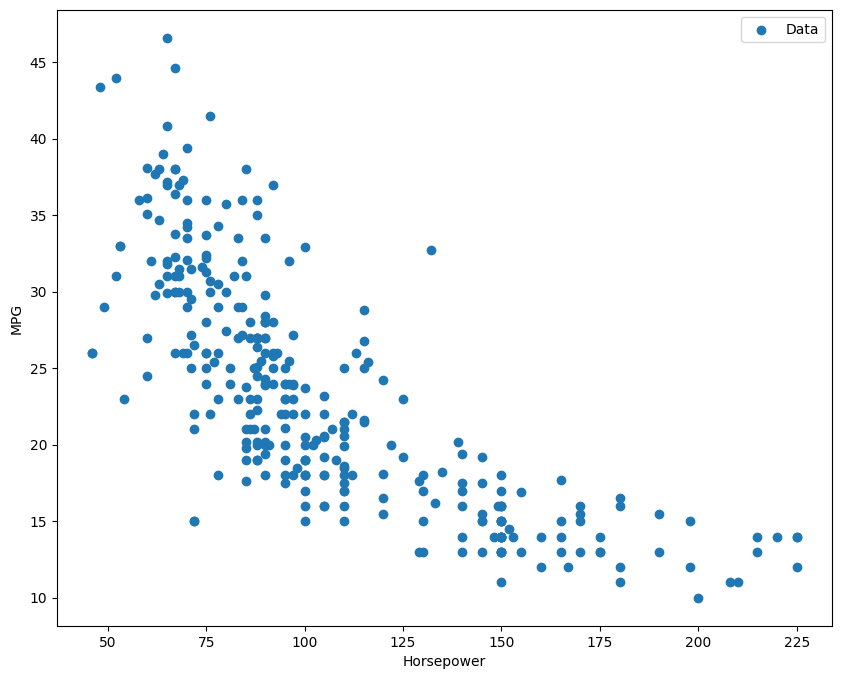

In [10]:
plot('Horsepower')

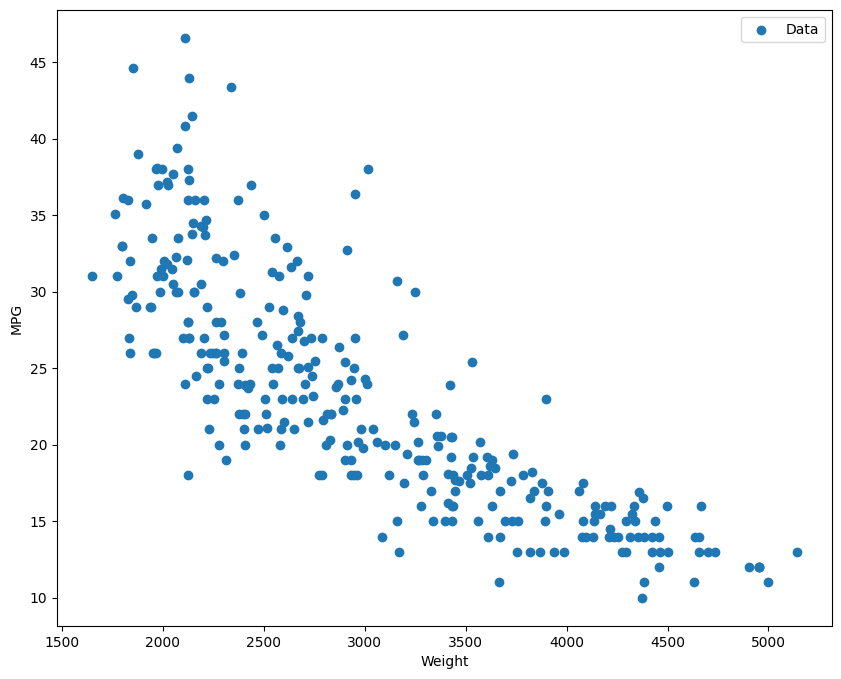

In [11]:
plot('Weight')

In [12]:
 # Normalizando
print(train_dataset.describe().transpose()[['mean','std']])

# Normalização:

normalizer = preprocessing.Normalization()

# adaptando para os dados
normalizer.adapt(np.array(train_features)) 
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [13]:
# Quando a camada é chamada, ela retorna os dados que foram inputados,
# com cada seção normalizada independentemente 
#formula da normalização: (dado - media) / desvio padrão

first = np.array(train_features[:1])
print("Primeiro Exemplo:\n",first)
print("Normalizado:\n",normalizer(first).numpy()) # converte tensor em numpy array


Primeiro Exemplo:
 [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalizado:
 [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [14]:
# Problema de Regressão
    # 1. Normalize o input de Horsepower
    # 2. Aplique uma transformação linear (y = m*x+b) para produzir 1 output usando layers.Dense

feature = 'Horsepower' # pode ser qualquer um
single_feature = np.array(train_features[feature]) # single_feature = array dos dados de feature em train_features ( 80% do dataset )
print(single_feature.shape, train_features.shape)

# Normalizando os dados
single_feature_normalizer = preprocessing.Normalization() # Normaliza usando (dado - media) / desvio padrão

# Adapta para os dados. Calcula media e desvio padrão
single_feature_normalizer.adapt(single_feature)


(314,) (314, 9)


In [15]:
# Modelo Sequencial

single_feature_model = keras.models.Sequential([
    single_feature_normalizer, # passa o modelo como parametro
    layers.Dense(units=1) # Modelo de Regressão Linear -> 1 UNIT = 1 Neuronio = 1 OUTPUT
])

In [16]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [30]:
#Perdas e otimizações

loss = keras.losses.MeanAbsoluteError() # Bom com o modelo de regressão linear # MeanSquaredError

# Reg = m*x + b >>> Erro = Reg - y
# MeanAbsoluteError -> Faz o somatório do módulo dos erros
# MeanSquaredError -> Faz o somatório do quadrado dos erros ( como no seu caderno )

optimizer = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optimizer, loss=loss) # A acuracia não faz sentido para a Regressão Linear

<br>
<h1> Regressão Linear / Gradiente Descentente </h1>
<p> A taxa de variação (derivada) calculada no ponto da reta em vermelho é maior do que no ponto minímo</p>
<p> E posteriormente m = m - (derivada parcial de Custo em M) </p>
<p> E posteriormente b = b - (derivada parcial de Custo em B)</p>
<p> Para Cada Iteração o valor decrementado por derivada será menor, o que permite passos longos com um m/b muito errado e curtos para m/b mais precisos</p>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*AZzu43KoxDamVpWMVW0zfw.png">
</br>

In [18]:
history = single_feature_model.fit( # .fit() retorna os valores
    train_features[feature], train_labels, # train_features para um feature de cada vez
    epochs = 100,
    verbose = 1,
    validation_split = 0.2 ) # 20% dos dados do treinamento serão separados, e usados para atualizar os parametros que no caso sao m e b

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 22.8699 - val_loss: 22.9365
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 22.0617 - val_loss: 22.1366
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 21.2686 - val_loss: 21.3370
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 20.4612 - val_loss: 20.5369
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 19.6616 - val_loss: 19.7370
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 18.8611 - val_loss: 18.9369
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 18.0608 - val_loss: 18.1369
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.2610 - val_loss: 17.3370
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 16.4619 - val_loss: 16.5371
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 15.6637 - val_loss: 15.7371
Epoch 11

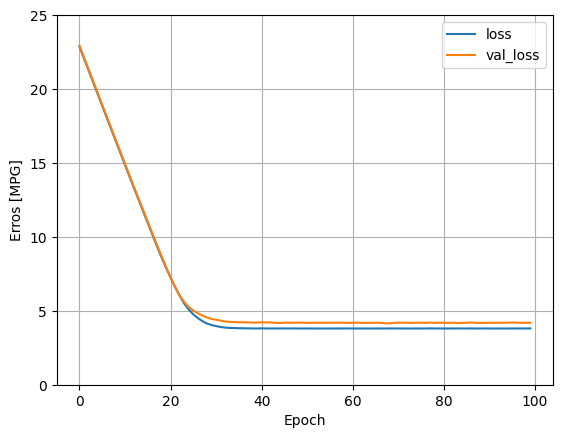

In [19]:
# plota a perda
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Erros [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [20]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1) 

3/3 [==============================] - 0s 665us/step - loss: 3.6293


3.6292505264282227

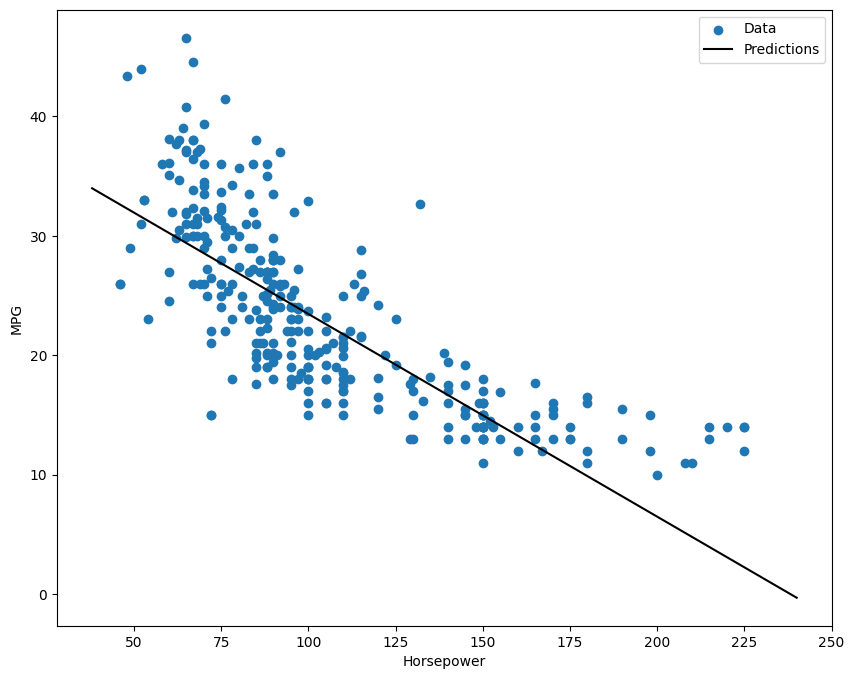

In [21]:
# Plota a Reta que prevê o gráfico
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200) # eixo x vai de um valor minimo - 10 até um valor maximo + 10
y = single_feature_model.predict(x) # x é o dado atual ela preve pela equação y = mx+b pra cada valor de x
    
plot(feature, x,y) # feature pode ser horsepower, cilindros,etc

In [22]:
# Agora Extendendo Para Deep Neural Networking
dnn_model = keras.Sequential([
    single_feature_normalizer,
    # MEIO
        # relu -> f(x) = max(0,x) se x > 0 retorna x, se x < 0 retorna 0

    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),

    # FIM
    layers.Dense(1) # lembrando 1 neuronio = 1 output
])
# Agora é so fazer a mesma coisa, compilar, treinar e plotar


In [23]:
dnn_model.compile(loss=loss,
                  optimizer = tf.keras.optimizers.Adam(0.001))
dnn_model.summary()
# com o output do sumario, da pra ver que 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [24]:
# treinando
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split = 0.2,
    verbose = 1, epochs = 100
) # Observe que o código pra deep neural network é quase a mesma coisa, só adiciona mais camadas de layers.Dense()


Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 22.9637 - val_loss: 23.2847
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.6471 - val_loss: 22.9238
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 22.2818 - val_loss: 22.5043
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 21.8500 - val_loss: 21.9800
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 21.2936 - val_loss: 21.3046
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 20.5698 - val_loss: 20.4447
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 19.6610 - val_loss: 19.4019
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 18.6190 - val_loss: 18.1970
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 17.4587 - val_loss: 17.0170
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 16.1261 - val_loss: 15.8094
Epoch 11

In [25]:
# Esta menor que 3, então definitavamente esta melhor
dnn_model.evaluate(test_features[feature],test_labels, verbose = 1)

3/3 [==============================] - 0s 664us/step - loss: 2.8643


2.864271879196167

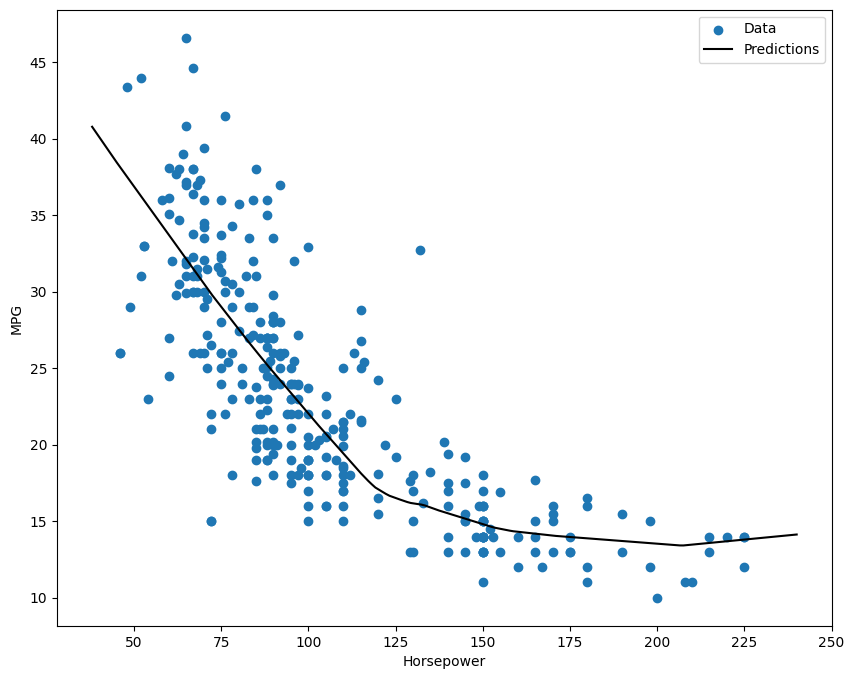

In [26]:
# Plotando e prevendo

x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x) # pro valor do x prevê um y -> y = mx + b

plot(feature, x,y)
# Aqui a previsão é não linear

In [27]:
# multiplos inputs

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = loss)


In [28]:
linear_model.fit(
    train_features, train_labels,
    epochs = 100,
    verbose = 1,
    # Calcula os resultados de validação com 20% dos dados de treinamento
    validation_split = 0.2)


Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 22.8850 - val_loss: 23.2176
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.0106 - val_loss: 22.5043
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.1736 - val_loss: 21.7535
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 20.3855 - val_loss: 20.9996
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 19.5545 - val_loss: 20.2951
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.7249 - val_loss: 19.5718
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 17.8981 - val_loss: 18.8392
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 17.0896 - val_loss: 18.1262
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 16.2667 - val_loss: 17.3894
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 15.4596 - val_loss: 16.6998
Epoch 11

In [29]:
linear_model.evaluate(
    # Ele recebe como argumento os dados que foram separados no início do código
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 664us/step - loss: 2.4909


2.490946054458618